<a href="https://colab.research.google.com/github/Ali-Kazmi/covid-visualizations/blob/master/vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


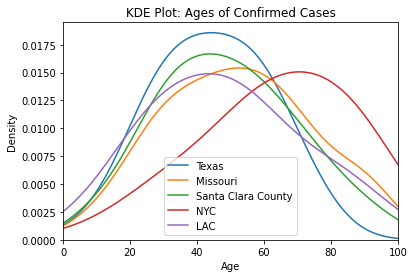

In [ ]:
import pandas as pd 
import seaborn as sns
texasdata = [.5]*37 + [5]*168 + [14.5]*435 + [24.5]*2271+ [34.5]*2671 + [44.5]*2735 + [55.5]*2692+[62]*1129+[67]*822+[72]*542+[77]*359
missouridata= [10]*453+[22]*721+[27]*898+[32]*837+[37]*807+[42]*830+[47]*961+[52]*993+[57]*1043+[62]*800+[67]*1072+[72]*653+[77]*511+[90]*1399
#Note: for missouri the 80+ category had 1399. I wasn't sure how to estimate the mean of this as its open ended, so I just used 80-100 and used 90 as the middle. 
sccdata=[10]*5+[24.5]*13+[34.5]*18+[44.5]*17+[54.5]*17+[64.5]*13+[74.5]*9+[84.5]*5+[95]*3
# SCC is in terms of percentages. Also kept the end consistent with missouri, using 100 as the ending categories right side. NYC is by per 100k. This is why auto normalizing is nice :)   
nycdata=[8.5]*308+[31]*2128+[54.5]*3464+[69.5]*3489+[87.5]*4210 #note: truncated decimals, as they aren't compatible w the plot  
lacdata=[9]*2003+[29]*15593+[53]*17436+[82.5]*8556 #Note: LAC had only 4 age group chunks reported... so this will need extra smoothing 


sns.kdeplot(texasdata, bw=10,label="Texas").set(xlim=(0,100),xlabel="Age", ylabel="Density",title="KDE Plot: Ages of Confirmed Cases");
sns.kdeplot(missouridata, bw=10,label="Missouri").set(xlim=(0,100));
sns.kdeplot(sccdata, bw=10,label="Santa Clara County").set(xlim=(0,100));
sns.kdeplot(nycdata, bw=15,label="NYC").set(xlim=(0,100));
sns.kdeplot(lacdata, bw=15,label="LAC").set(xlim=(0,100));
#this uses missouri data from 5/21, SCC data from 5/24, NYC data from the dash on 5/25 and Texas data from 5/25

#future todo: make a spain one: have 4 lines: spain conf males, spain conf females, spain male dead, spain female dead

todo: figure out how to overlay all these distributions!!!!

idea 1: convert it to numerical values somehow.... use x axis as age? Then could convert these categorical things into..... numbers??? Try this with one, see if I can manage to maintain the distribution. Plot it with a seaborn distplot. If this works, I can just add a bunch of seaborn distplots as above (normalize it to be percents, not just cases) and we good

idea 2: youpeng's way, with the categories and stuff (issue: how do we standardize? They have different x axis! 

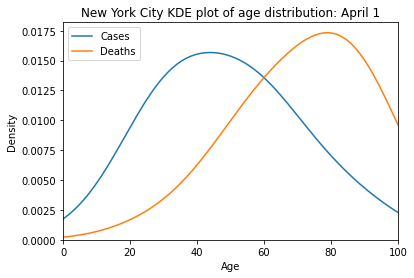

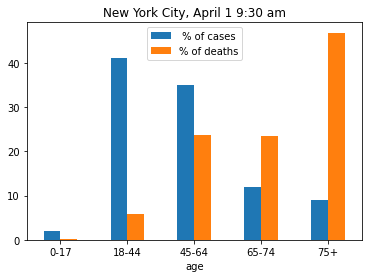

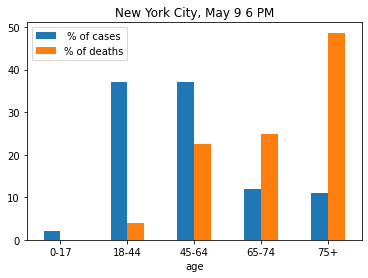

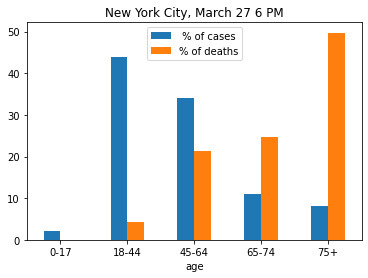

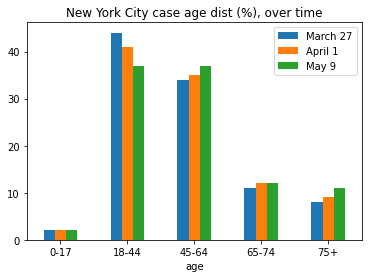

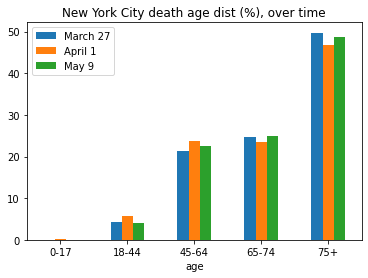

In [ ]:
import pandas as pd 
import seaborn as sns
nycdeaths = [8.5]*1+[31]*66+[54.5]*271+[69.5]*268+[87.5]*533
nyccases=[8.5]*803+[31]*18463+[54.5]*15818+[69.5]*5484+[87.5]*4241
sns.kdeplot(nyccases, bw=15,label="Cases").set(xlim=(0,100),xlabel="Age", ylabel="Density",title="New York City KDE plot of age distribution: April 1");
sns.kdeplot(nycdeaths, bw=15,label="Deaths").set(xlim=(0,100),xlabel="Age", ylabel="Density");

#Sources: 
#https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary-deaths-04012020-1.pdf 
#https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary-04012020-1.pdf

dfcases = pd.DataFrame({'age':['0-17', '18-44', '45-64','65-74','75+'], ' % of cases':[2,41,35,12,9],'% of deaths':[(1/1139)*100,(66/1139)*100,(271/1139)*100,(268/1139)*100,(533/1139)*100]})
ax = dfcases.plot.bar(x='age', rot=0,title='New York City, April 1 9:30 am')

dfcases = pd.DataFrame({'age':['0-17', '18-44', '45-64','65-74','75+'], ' % of cases':[2,37,37,12,11],'% of deaths':[(8/14753)*100,(583/14753)*100,(3316/14753)*100,(3664/14753)*100,(7180/14753)*100]})
ax = dfcases.plot.bar(x='age', rot=0,title='New York City, May 9 6 PM')

dfcases = pd.DataFrame({'age':['0-17', '18-44', '45-64','65-74','75+'], ' % of cases':[2,44,34,11,8],'% of deaths':[(0/366)*100,(16/366)*100,(78/366)*100,(90/366)*100,(182/366)*100]})
ax = dfcases.plot.bar(x='age', rot=0,title='New York City, March 27 6 PM')

dftotals=pd.DataFrame({'age':['0-17', '18-44', '45-64','65-74','75+'], 'March 27':[2,44,34,11,8],'April 1':[2,41,35,12,9],'May 9':[2,37,37,12,11]})
ax = dftotals.plot.bar(x='age', rot=0,title='New York City case age dist (%), over time')

dfdeaths=pd.DataFrame({'age':['0-17', '18-44', '45-64','65-74','75+'], 'March 27':[(0/366)*100,(16/366)*100,(78/366)*100,(90/366)*100,(182/366)*100],'April 1':[(1/1139)*100,(66/1139)*100,(271/1139)*100,(268/1139)*100,(533/1139)*100],'May 9':[(8/14753)*100,(583/14753)*100,(3316/14753)*100,(3664/14753)*100,(7180/14753)*100]})
ax = dfdeaths.plot.bar(x='age', rot=0,title='New York City death age dist (%), over time')

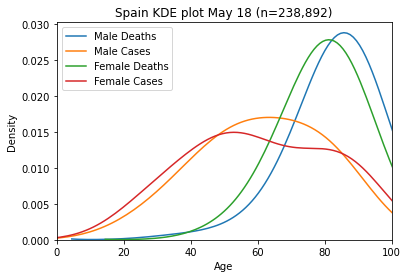

In [ ]:
#Spain study https://elpais.com/sociedad/2020/04/09/actualidad/1586437657_937910.html
import pandas as pd 
import seaborn as sns
spaindeathsmale = [4.5]*0+[14.5]*0+[24.5]*0+[34.5]*1+[44.5]*1+[54.5]*2+[64.5]*6+[74.5]*18+[84.5]*43+[94.5]*30
spainconfirmedmale = [4.5]*0+[14.5]*1+[24.5]*4+[34.5]*8+[44.5]*14+[54.5]*18+[64.5]*17+[74.5]*17+[84.5]*15+[94.5]*5
  
spaindeathsfemale = [4.5]*0+[14.5]*0+[24.5]*0+[34.5]*0+[44.5]*1+[54.5]*4+[64.5]*11+[74.5]*29+[84.5]*40+[94.5]*15
spainconfirmedfemale = [4.5]*0+[14.5]*1+[24.5]*7+[34.5]*10+[44.5]*15+[54.5]*18+[64.5]*12+[74.5]*11+[84.5]*16+[94.5]*10
#spainconfirmed=[8.5]*803+[31]*18463+[54.5]*15818+[69.5]*5484+[87.5]*4241

sns.kdeplot(spaindeathsmale, bw=10,label="Male Deaths").set(xlim=(0,100),xlabel="Age", ylabel="Density",title="Spain KDE plot May 18 (n=238,892)");
sns.kdeplot(spainconfirmedmale, bw=10,label="Male Cases").set(xlim=(0,100),xlabel="Age", ylabel="Density");
sns.kdeplot(spaindeathsfemale, bw=10,label="Female Deaths").set(xlim=(0,100),xlabel="Age", ylabel="Density");
sns.kdeplot(spainconfirmedfemale, bw=10,label="Female Cases").set(xlim=(0,100),xlabel="Age", ylabel="Density");



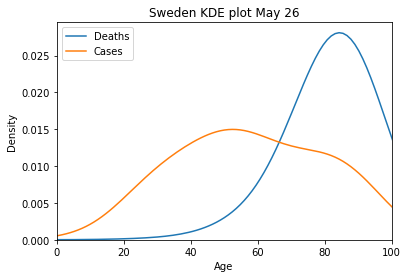

In [ ]:
#Sweden study 
#https://www.statista.com/statistics/1107913/number-of-coronavirus-deaths-in-sweden-by-age-groups/
#https://www.statista.com/statistics/1107905/number-of-coronavirus-cases-in-sweden-by-age-groups/
import pandas as pd 
import seaborn as sns
swedendeaths = [4.5]*1+[14.5]*0+[24.5]*8+[34.5]*12+[44.5]*39+[54.5]*129+[64.5]*294+[74.5]*909+[84.5]*1694+[94.5]*1039
swedenconfirmed= [4.5]*168+[14.5]*401+[24.5]*3104+[34.5]*4051+[44.5]*4962+[54.5]*6190+[64.5]*4186+[74.5]*3888+[84.5]*4830+[94.5]*2652
  


sns.kdeplot(swedendeaths, bw=10,label="Deaths").set(xlim=(0,100),xlabel="Age", ylabel="Density",title="Sweden KDE plot May 26");
sns.kdeplot(swedenconfirmed, bw=10,label="Cases").set(xlim=(0,100),xlabel="Age", ylabel="Density");




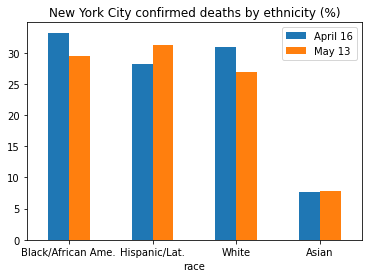

In [ ]:

import pandas as pd 

#Sources: 
#https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-deaths-race-ethnicity-05142020-1.pdf
#https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-deaths-race-ethnicity-04162020-1.pdf

dfdeaths=pd.DataFrame({'race':['Black/African Ame.', 'Hispanic/Lat.', 'White','Asian'],'April 16':[33.2,28.2,30.9,7.7],'May 13':[29.4,31.3,26.9,7.9]})
ax = dfdeaths.plot.bar(x='race', rot=0,title='New York City confirmed deaths by ethnicity (%)')

todo: bar chart of states with 10 year distributions 



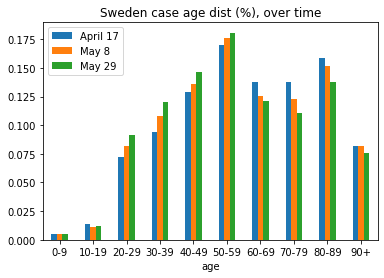

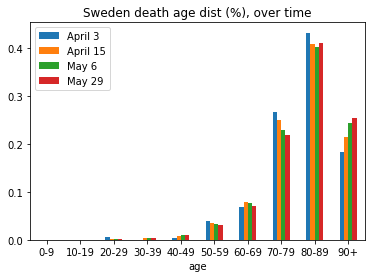

In [ ]:
import pandas as pd
#Sweden stats 
#source: https://www.statista.com/statistics/1107913/number-of-coronavirus-deaths-in-sweden-by-age-groups/
#To get past days, use wayback machine 

dftotals=pd.DataFrame({'age':['0-9', '10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'], 'April 17':[69/13216,179/13216,952/13216,1241/13216,1703/13216,2242/13216,1824/13216,1822/13216,2094/13216,1085/13216],'May 8':[118/25265,286/25265,2057/25265,2733/25265,3432/25265,4450/25265,3176/25265,3098/25265,3832/25265,2076/25265],'May 29':[176/36476,435/36476,3344/36476,4380/36476,5326/36476,6590/36476,4428/36476,4025/36476,5006/36476,2758/36476]})
ax = dftotals.plot.bar(x='age', rot=0,title='Sweden case age dist (%), over time')

dftotals=pd.DataFrame({'age':['0-9', '10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'], 'April 3':[0,0,2/333,0,1/333,13/333,23/333,89/333,144/333,61/333],'April 15':[0,0,3/1203,4/1203,10/1203,41/1203,95/1203,301/1203,492/1203,257/1203],'May 6':[1/2940,0,7/2940,11/2940,28/2940,94/2940,223/2940,674/2940,1182/2940,720/2940],'May 29':[1/4350,0,8/4350,12/4350,42/4350,132/4350,303/4350,955/4350,1789/4350,1108/4350]})
ax = dftotals.plot.bar(x='age', rot=0,title='Sweden death age dist (%), over time')


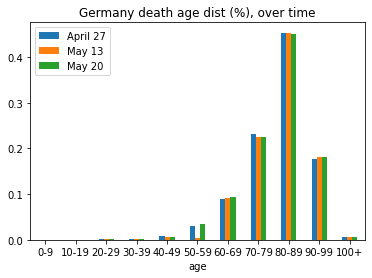

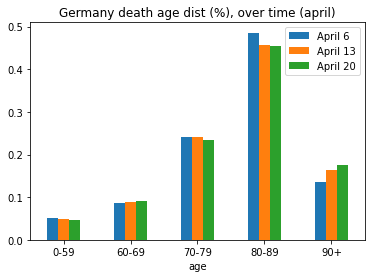

In [ ]:
import pandas as pd
#germany stats 
#source: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/2020-05-20-en.pdf?__blob=publicationFile


dftotals=pd.DataFrame({'age':['0-9', '10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+'],'April 27':[1/5744,1/5744,5/5744,9/5744,44/5744,179/5744,515/5744,1331/5744,2605/5744,1019/5744,35/5744],'May 13':[1/7629,2/7629,8/7629,20/7629,54/7629,25/7629,695/7629,1714/7629,3450/7629,1382/7629,46/7629],'May 20':[1/8087,2/8087,8/8087,19/8087,58/8087,274/8087,751/8087,1814/8087,3636/8087,1474/8087,50/8087]})
ax = dftotals.plot.bar(x='age', rot=0,title='Germany death age dist (%), over time')


dftotals=pd.DataFrame({'age':['0-59', '60-69', '70-79','80-89','90+'],'April 6':[72/1431,124/1431,344/1431,695/1431,194/1431],'April 13':[134/2793,246/2793,676/2793,1279/2793,458/2793],'April 20': [201/4401,398/4401,1027/4401,2000/4401,775/4401]})
ax = dftotals.plot.bar(x='age', rot=0,title='Germany death age dist (%), over time (april)')


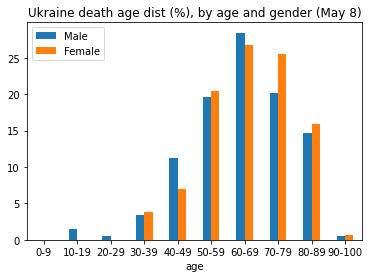

In [ ]:
import pandas as pd
#https://www.statista.com/statistics/1109638/covid-19-deaths-by-age-and-gender-ukraine/

dftotals=pd.DataFrame({'age':['0-9', '10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'],'Male':[0,1.47,.49,3.43,11.27,19.61,28.43,20.1,14.71,0.49],'Female':[0,0,0,3.82,7.01,20.38,26.75,25.48,15.92,.64]})
ax = dftotals.plot.bar(x='age', rot=0,title='Ukraine death age dist (%), by age and gender (May 8)')


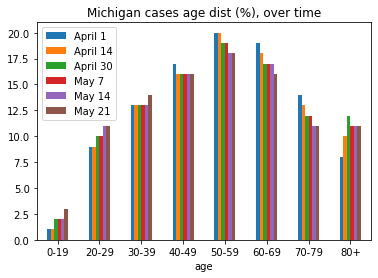

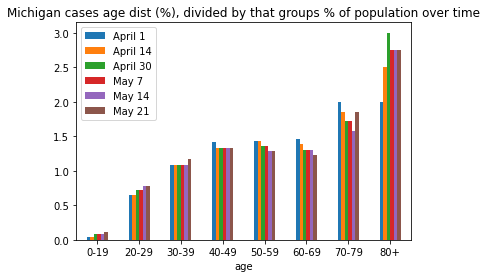

In [ ]:
#Michigan data


import pandas as pd
#https://covidtracking.com/data/state/michigan source
#https://censusreporter.org/profiles/04000US21-michigan/
dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'April 1':[1,9,13,17,20,19,14,8],'April 14':[1,9,13,16,20,18,13,10],'April 30':[2,10,13,16,19,17,12,12],'May 7':[2,10,13,16,19,17,12,11],'May 14':[2,11,13,16,18,17,11,11],'May 21':[3,11,14,16,18,16,11,11]})
ax = dftotals.plot.bar(x='age', rot=0,title='Michigan cases age dist (%), over time')


#dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'April 1':[7615*.01,7615*.09,7615*.13,7615*.17,7615*.20,7615*.19,7615*.14,7615*.08],'April 14':[25635*.01,25635*.09,25635*.13,25635*.16,25635*.20,25635*.18,25635*.13,25635*.10],'April 30':[2,10,13,16,19,17,12,12],'May 7':[2,10,13,16,19,17,12,11],'May 14':[2,11,13,16,18,17,11,11],'May 21':[3,11,14,16,18,16,11,11]})
#ax = dftotals.plot.bar(x='age', rot=0,title='Michigan cases age dist (%) * number of cases over time')
#Edit: realized the method above was unneeded. The below gets the same results with less unnecessary typing 

dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'April 1':[.01/.25,.09/.14,.13/.12,.17/.12,.20/.14,.19/.13,.14/.07,.08/.04],'April 14':[.01/.25,.09/.14,.13/.12,.16/.12,.20/.14,.18/.13,.13/.07,.10/.04],'April 30':[.02/.25,.10/.14,.13/.12,.16/.12,.19/.14,.17/.13,.12/.07,.12/.04],'May 7':[.02/.25,.10/.14,.13/.12,.16/.12,.19/.14,.17/.13,.12/.07,.11/.04],'May 14':[.02/.25,.11/.14,.13/.12,.16/.12,.18/.14,.17/.13,.11/.07,.11/.04],'May 21':[.03/.25,.11/.14,.14/.12,.16/.12,.18/.14,.16/.13,.13/.07,.11/.04]})
ax = dftotals.plot.bar(x='age', rot=0,title='Michigan cases age dist (%), divided by that groups % of population over time')



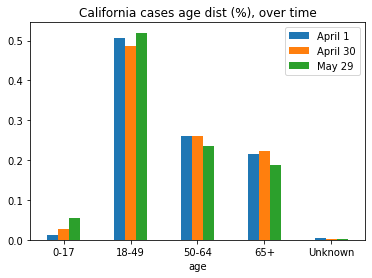

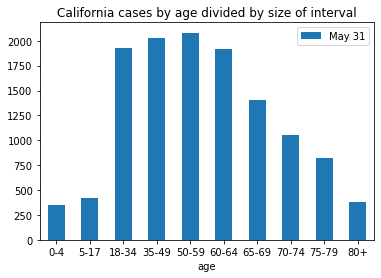

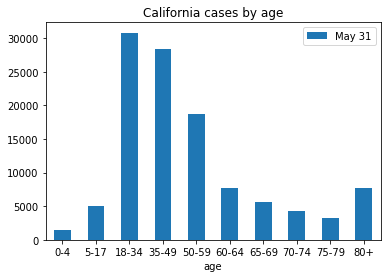

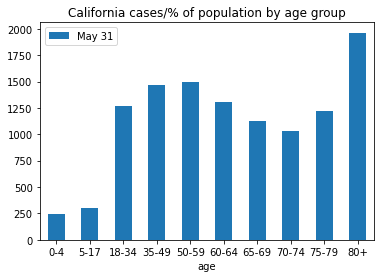

In [ ]:
import pandas as pd
#https://covidtracking.com/data/state/california source

dftotals=pd.DataFrame({'age':['0-17', '18-49', '50-64','65+','Unknown'],'April 1':[90/8155,4137/8155,2131/8155,1764/8155,33/8155],'April 30':[1263/46500,22596/46500,12153/46500,10413/46500,75/46500],'May 29':[5861/106878,55552/106878,25223/106878,20073/106878,169/106878]})
ax = dftotals.plot.bar(x='age', rot=0,title='California cases age dist (%), over time')



dftotals=pd.DataFrame({'age':['0-4', '5-17', '18-34','35-49','50-59','60-64','65-69','70-74','75-79','80+'],'May 31':[1404/4,5084/12,30791/16,28353/14,18727/9,7678/4,5637/4,4218/4,3284/4,7653/20]})
ax = dftotals.plot.bar(x='age', rot=0,title='California cases by age divided by size of interval')



dftotals=pd.DataFrame({'age':['0-4', '5-17', '18-34','35-49','50-59','60-64','65-69','70-74','75-79','80+'],'May 31':[1404,5084,30791,28353,18727,7678,5637,4218,3284,7653]})
ax = dftotals.plot.bar(x='age', rot=0,title='California cases by age')


dftotals=pd.DataFrame({'age':['0-4', '5-17', '18-34','35-49','50-59','60-64','65-69','70-74','75-79','80+'],'May 31':[1404/5.8,5084/16.7,30791/24.3,28353/19.3,18727/12.5,7678/5.9,5637/5,4218/4.1,3284/2.7,7653/3.9]})
ax = dftotals.plot.bar(x='age', rot=0,title='California cases/% of population by age group')

In [ ]:
from IPython.display import Image
Image('bp.png')

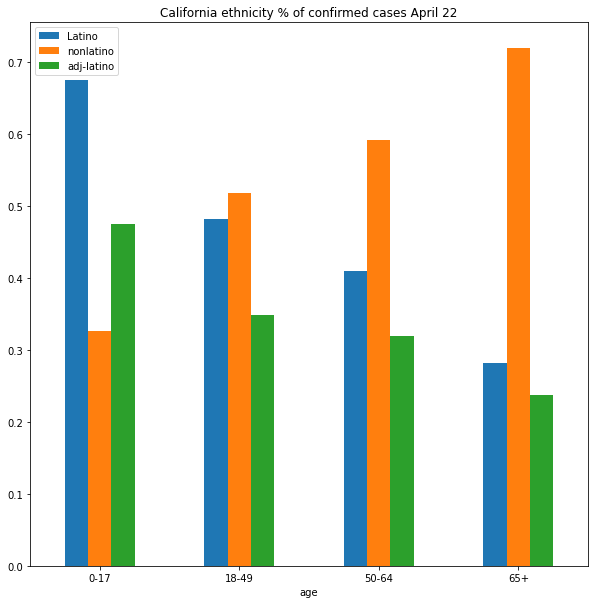

In [ ]:
#Cali demographics 
#https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx 
#https://web.archive.org/web/20200424162016/https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx
dftotals=pd.DataFrame({'age':['0-17', '18-49', '50-64','65+'],'Latino':[.674,.482,.409,.281],'nonlatino':[1-.674,1-.482,1-.409,1-.281],'adj-latino':[.674/((.479*1.88)+1-.479),.482/((.435*1.88)+1-.435),.409/((.322*1.88)+1-.322),.281/((.212*1.88)+1-.212)]})
ax = dftotals.plot.bar(x='age', rot=0,title='California ethnicity % of confirmed cases April 22',figsize=(10,10))


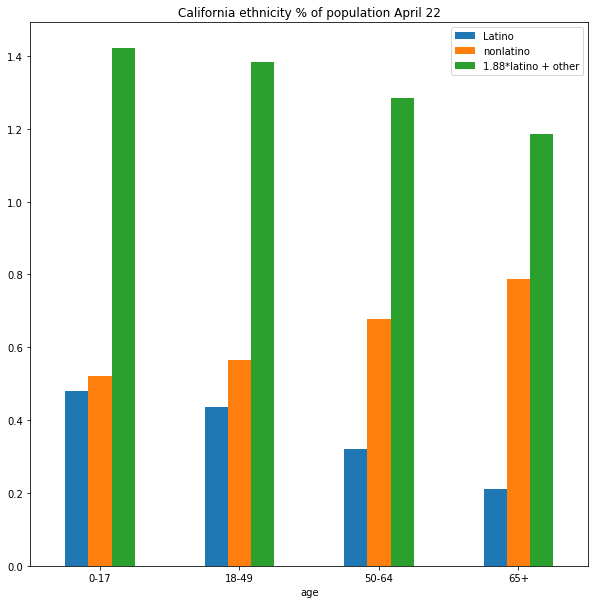

In [ ]:
#Cali demographics 
#https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx 
#https://web.archive.org/web/20200424162016/https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx
dftotals=pd.DataFrame({'age':['0-17', '18-49', '50-64','65+'],'Latino':[.479,.435,.322,.212],'nonlatino':[1-.479,1-.435,1-.322,1-.212],'1.88*latino + other':[(.479*1.88)+1-.479,(.435*1.88)+1-.435,(.322*1.88)+1-.322,(.212*1.88)+1-.212]})
ax = dftotals.plot.bar(x='age', rot=0,title='California ethnicity % of population April 22',figsize=(10,10))


In [ ]:
dftotals=pd.DataFrame({'age':['0-17', '18-49', '50-64','65+'],'nonlatino':[(1-.674)/17,(1-.482)/31,(1-.409)/14,(1-.281)/35],'1.88*latino + other':[((.674*1.88)+1-.674)/17,((.482*1.88)+1-.482)/31,((.409*1.88)+1-.409)/14,((.281*1.88)+1-.281)/35]})
ax = dftotals.plot.bar(x='age', rot=0,title='California ethnicity % of confirmed cases May 31',figsize=(10,10))


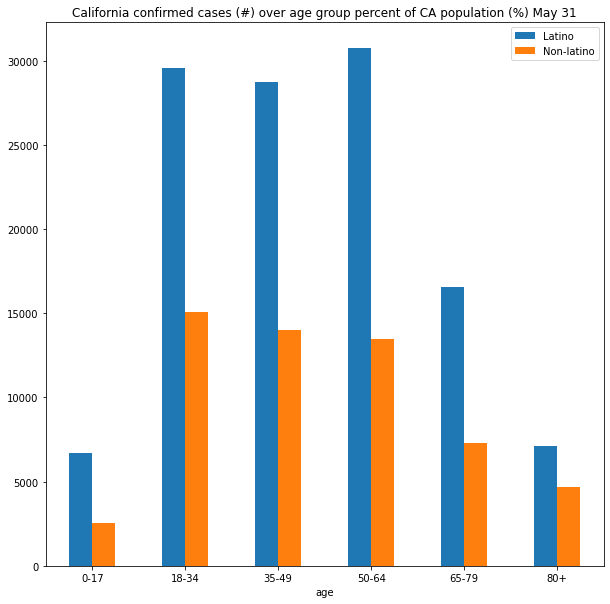

In [ ]:
import pandas as pd

#Cali demographics 
#https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx 
#https://web.archive.org/web/20200424162016/https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx
dftotals=pd.DataFrame({'age':['0-17', '18-34','35-49', '50-64','65-79','80+'],'Latino':[3202/.479,13309/.45,11932/.415,9903/.322,3616/.218,1397/.196],'Non-latino':[1337/.521,8305/.55,8199/.585,9122/.678,5717/.782,3743/.804]})
ax = dftotals.plot.bar(x='age', rot=0,title='California confirmed cases (#) over age group percent of CA population (%) May 31',figsize=(10,10))


#percent of population for an age group: (california has 39.51 million)
#0-17: 22.5%
#18-49: 43.6%
#50-64: 16.4%
#65+: 15.7% 

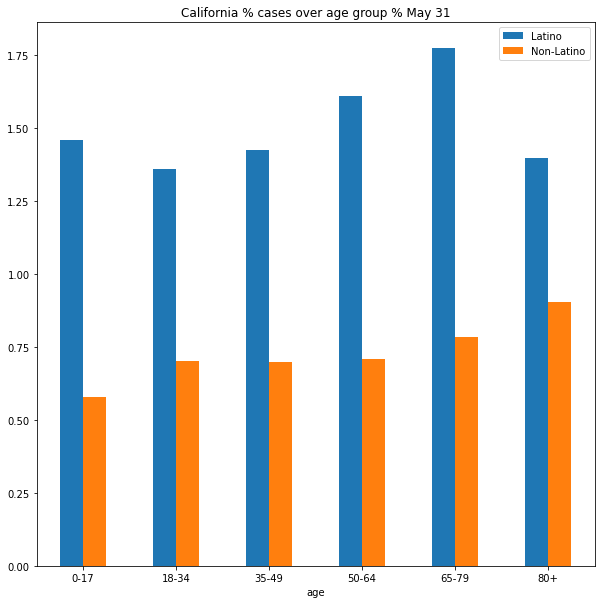

In [ ]:
import pandas as pd

#Cali demographics 
#https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx 
#https://web.archive.org/web/20200424162016/https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/COVID-19/Race-Ethnicity.aspx
dftotals=pd.DataFrame({'age':['0-17', '18-34','35-49', '50-64','65-79','80+'],'Latino':[.699/.479,.613/.45,.591/.415,.519/.322,.387/.218,.274/.196],'Non-Latino':[(1-.699)/(1-.479),(1-.613)/(1-.45),(1-.591)/(1-.415),(1-.519)/(1-.322),(1-.387)/(1-.218),(1-.274)/(1-.196)]})
ax = dftotals.plot.bar(x='age', rot=0,title='California % cases over age group % May 31',figsize=(10,10))


#percent of population for an age group: (california has 39.51 million)
#0-17: 22.5%
#18-49: 43.6%
#50-64: 16.4%
#65+: 15.7% 

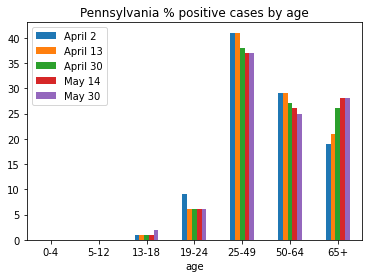

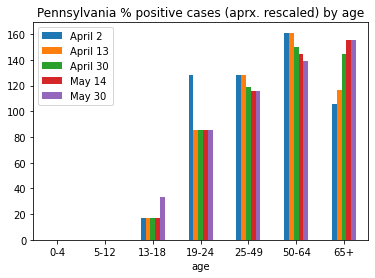

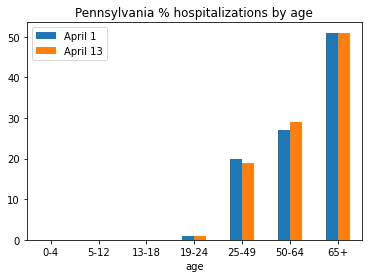

In [ ]:
import pandas as pd

#Penn
#https://covidtracking.com/data/state/pennsylvania

dftotals=pd.DataFrame({'age':['0-4', '5-12','13-18', '19-24','25-49','50-64','65+'],'April 2':[0,0,1,9,41,29,19],'April 13':[0,0,1,6,41,29,21],'April 30':[0,0,1,6,38,27,26],'May 14':[0,0,1,6,37,26,28],'May 30':[0,0,2,6,37,25,28]})
ax = dftotals.plot.bar(x='age', rot=0,title='Pennsylvania % positive cases by age')


dftotals=pd.DataFrame({'age':['0-4', '5-12','13-18', '19-24','25-49','50-64','65+'],'April 2':[0,0,1/.06,9/.07,41/.32,29/.18,19/.18],'April 13':[0,0,1/.06,6/.07,41/.32,29/.18,21/.18],'April 30':[0,0,1/.06,6/.07,38/.32,27/.18,26/.18],'May 14':[0,0,1/.06,6/.07,37/.32,26/.18,28/.18],'May 30':[0,0,2/.06,6/.07,37/.32,25/.18,28/.18]})
ax = dftotals.plot.bar(x='age', rot=0,title='Pennsylvania % positive cases (aprx. rescaled) by age')

dftotals=pd.DataFrame({'age':['0-4', '5-12','13-18', '19-24','25-49','50-64','65+'],'April 1':[0,0,0,1,20,27,51],'April 13':[0,0,0,1,19,29,51]})
ax = dftotals.plot.bar(x='age', rot=0,title='Pennsylvania % hospitalizations by age')




Todo: make one master plot of these age cases and age deaths (no need to do over time) 

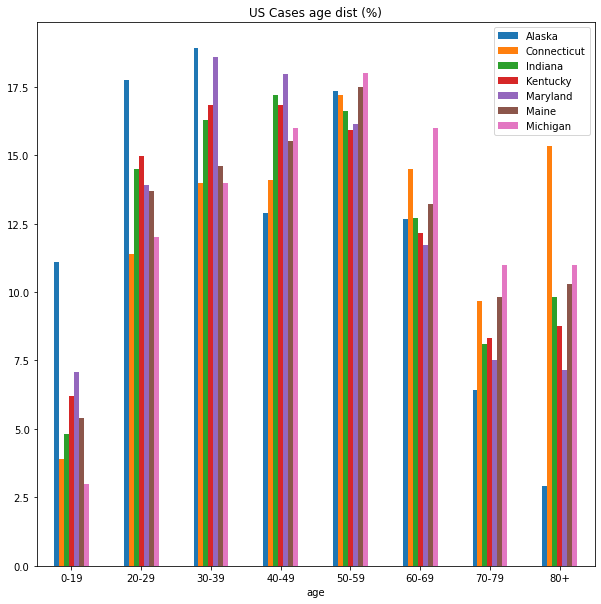

In [ ]:
import pandas as pd
dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'Alaska':[(7.99+3.12),17.74,18.91,12.87,17.35,12.67,6.43,2.92],'Connecticut':[(538+1136)/430.97,4903/430.97,6021/430.97,6072/430.97,7405/430.97,6249/430.97,4165/430.97,6608/430.97],'Indiana':[4.8,14.5,16.3,17.2,16.6,12.7,8.1,9.8],'Kentucky':[(212+451)/106.86,1600/106.86,1800/106.86,1800/106.86,1700/106.86,1300/106.86,888/106.86,935/106.86],'Maryland':[(1422+2538)/558.58,7768/558.58,10375/558.58,10033/558.58,9006/558.58,6536/558.58,4190/558.58,3990/558.58],'Maine':[5.4,13.7,14.6,15.5,17.5,13.2,9.8,10.3],'Michigan':[3,12,14,16,18,16,11,11]})
ax = dftotals.plot.bar(x='age', rot=0,title='US Cases age dist (%)',figsize=(10,10))

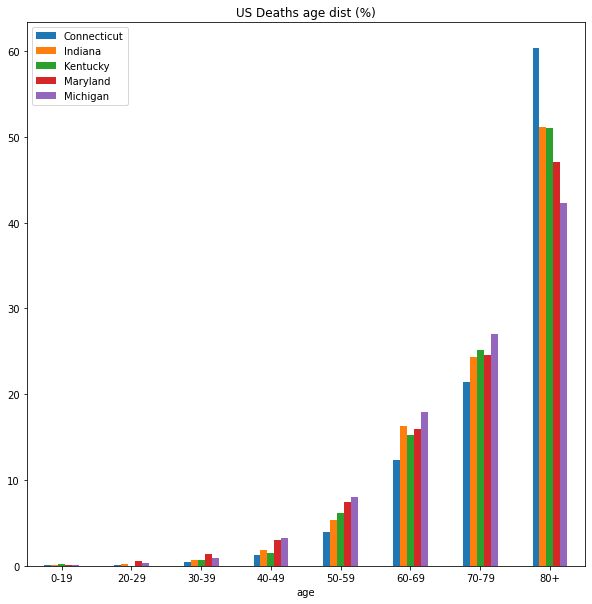

In [ ]:
import pandas as pd
dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'Connecticut':[2/40.06,4/40.06,18/40.06,51/40.06,159/40.06,495/40.06,859/40.06,2418/40.06],'Indiana':[.1,.2,.7,1.9,5.3,16.3,24.3,51.2],'Kentucky':[1/4.58,0,3/4.58,7/4.58,28/4.58,70/4.58,115/4.58,234/4.58],'Maryland':[1/26.63,14/26.63,37/26.63,81/26.63,197/26.63,424/26.63,656/26.63,1253/26.63],'Michigan':[6/55.96,20/55.96,53/55.96,179/55.96,452/55.96,1006/55.96,1512/55.96,2368/55.96]})
ax = dftotals.plot.bar(x='age', rot=0,title='US Deaths age dist (%)',figsize=(10,10))

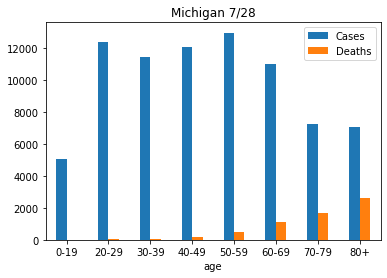

In [ ]:
#https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html
import pandas as pd
dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'Cases':[5059,12376,11419,12061,12950,10978,7253,7038],'Deaths':[5,26,60,202,504,1095,1650,2628]})
ax = dftotals.plot.bar(x='age', rot=0,title='Michigan 7/28')

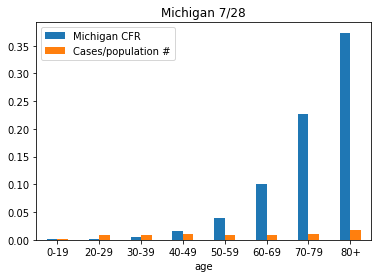

In [ ]:
#https://censusreporter.org/profiles/04000US26-michigan/
import pandas as pd
dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'Michigan CFR':[5/5059,26/12376,60/11419,202/12061,504/12950,1095/10978,1650/7253,2628/7038],'Cases/population #':[5059/(.25*9995915),12376/(.14*9995915),11419/(.12*9995915),12061/(.12*9995915),12950/(.14*9995915),10978/(.13*9995915),7253/(.07*9995915),7038/(.04*9995915)]})

ax = dftotals.plot.bar(x='age', rot=0,title='Michigan 7/28')

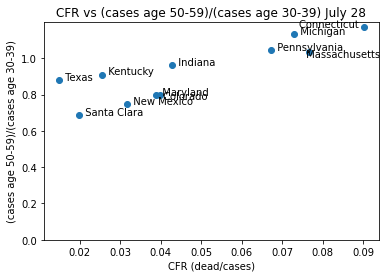

In [ ]:
#sources https://www.sccgov.org/sites/covid19/Pages/dashboard-demographics-of-cases-and-deaths.aspx 
# michigans covid dashboard 
# https://portal.ct.gov/Coronavirus/COVID-19-Data-Tracker



import matplotlib.pyplot as plt
y = [12950/11419, (.134*9359)/(.195*9359),12879/16122,8202/6991,5589/6362,2682/3593,17331/16609,.152/.158,4093/4497,18272/17627,.1437/.1808]
cfr = [6421/87958, 185/9359,3327/85524,4423/49077,5877/394265,626/19761,7146/106331,2725/63678,719/28126,8331/108740,1807/45314]
n = ['  Michigan', '  Santa Clara','  Maryland',' Connecticut','  Texas','  New Mexico','  Pennsylvania','  Indiana','  Kentucky',' Massachusetts','Colorado']

plt.scatter(cfr, y)
plt.title("CFR vs (cases age 50-59)/(cases age 30-39) July 28")
plt.xlabel("CFR (dead/cases)")
plt.ylim(ymin=0)
plt.ylabel("(cases age 50-59)/(cases age 30-39)")

for i, txt in enumerate(n):
  if(txt!=" Connecticut" and txt != " Massachusetts" and txt!='Colorado'):
    plt.annotate(txt, (cfr[i], y[i]))

plt.annotate("Connecticut ",(cfr[3]-0.016,y[3]))
plt.annotate(" Massachusetts",(cfr[9]-.0015,y[9]-.03))
plt.annotate(" Colorado",(cfr[10],y[10]-.02))
plt.savefig('cfrScatter.jpeg')

Text(0.03987730061349693, 0.6158407079646018, ' Colorado')

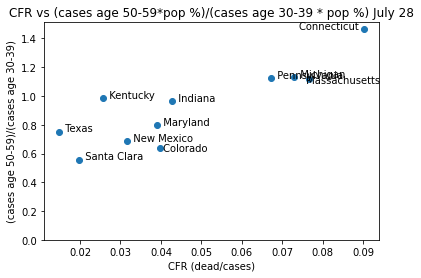

In [ ]:
#sources https://www.sccgov.org/sites/covid19/Pages/dashboard-demographics-of-cases-and-deaths.aspx 
# michigans covid dashboard 
# https://portal.ct.gov/Coronavirus/COVID-19-Data-Tracker



import matplotlib.pyplot as plt
y = [(12950*.14)/(11419*.14), (.134*9359*.13)/(.195*9359*.16),(12879*.14)/(16122*.14),(8202*.15)/(6991*.12),(5589*.12)/(6362*.14),(2682*.12)/(3593*.13),(17331*.14)/(16609*.13),(.152*.13)/(.158*.13),(4093*.13)/(4497*.12),(18272*.14)/(17627*.13),(.1437*.12)/(.1808*.15)]
cfr = [6421/87958, 185/9359,3327/85524,4423/49077,5877/394265,626/19761,7146/106331,2725/63678,719/28126,8331/108740,1807/45314]
n = ['  Michigan', '  Santa Clara','  Maryland',' Connecticut','  Texas','  New Mexico','  Pennsylvania','  Indiana','  Kentucky',' Massachusetts','Colorado']

plt.scatter(cfr, y)
plt.title("CFR vs (cases age 50-59*pop %)/(cases age 30-39 * pop %) July 28")
plt.xlabel("CFR (dead/cases)")
plt.ylabel("(cases age 50-59)/(cases age 30-39)")
plt.ylim(ymin=0)

for i, txt in enumerate(n):
  if(txt!=" Connecticut" and txt != " Massachusetts" and txt!='Colorado'):
    plt.annotate(txt, (cfr[i], y[i]))

plt.annotate("Connecticut ",(cfr[3]-0.016,y[3]))
plt.annotate(" Massachusetts",(cfr[9]-.0015,y[9]-.03))
plt.annotate(" Colorado",(cfr[10],y[10]-.02))

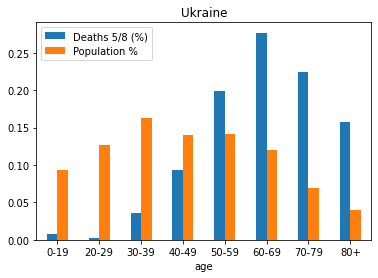

In [ ]:
#http://data.un.org/Data.aspx?d=POP&f=tableCode%3A22
#https://www.statista.com/statistics/1109638/covid-19-deaths-by-age-and-gender-ukraine/
import pandas as pd
dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'Deaths 5/8 (%)':[0.8/100,0.3/100,3.6/100,9.4/100,19.9/100,27.7/100,22.4/100,15.8/100],'Population %':[0.0932950667,0.1271878571,0.1630972633,0.1405715445,0.1415672863,0.1202601829,0.06928164512,0.0397449203]})

ax = dftotals.plot.bar(x='age', rot=0,title='Ukraine')

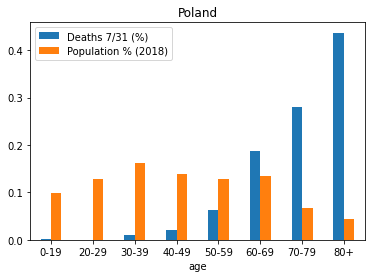

In [ ]:
#http://data.un.org/Data.aspx?d=POP&f=tableCode%3A22
#https://www.statista.com/statistics/1109638/covid-19-deaths-by-age-and-gender-ukraine/
import pandas as pd
dftotals=pd.DataFrame({'age':['0-19', '20-29', '30-39','40-49','50-59','60-69','70-79','80+'],'Deaths 7/31 (%)':[0.12/100,0/100,1.11/100,2.15/100,6.23/100,18.75/100,27.96/100,43.68/100],'Population % (2018)':[0.09869162626,0.1279479171,0.1612355759,0.1380080627,0.1281429315,0.1341664427,0.06626852416,0.04312327192]})

ax = dftotals.plot.bar(x='age', rot=0,title='Poland')

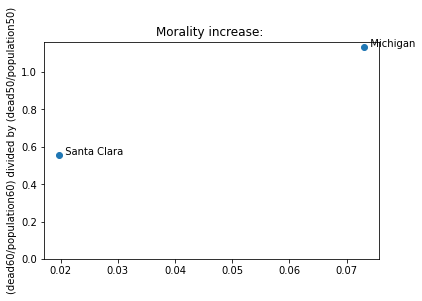

In [ ]:
import matplotlib.pyplot as plt
y = [(12950*.14)/(11419*.14), (.134*9359*.13)/(.195*9359*.16)]
cfr = [6421/87958, 185/9359]
n = ['  Michigan', '  Santa Clara']

plt.scatter(cfr, y)
plt.title("Morality increase: ")
plt.xlabel("")
plt.ylabel("(dead60/population60) divided by (dead50/population50)")
plt.ylim(ymin=0)

for i, txt in enumerate(n):
  if(txt!=" Connecticut" and txt != " Massachusetts" and txt!='Colorado'):
    plt.annotate(txt, (cfr[i], y[i]))


In [ ]:
#(dead60/population60) divided by (dead50/population50)
#michigan: 
print((1084/1299468.95)/(493/1399428.1))

#maryland
print((524/725126.16)/(252/845980.52))


#connecticut 
print((540/428719.8)/(178/535899.75))

#brazil 
print((19095/16292185)/(11265/24026608))

#ukraine 
print((99.997/5076996)/(71.839/5976513))


#california 
print(((293+401)/(2333865.6550000003+1977852.25))/(378/4944630.625))

#louisiana 
print((338/12.7)/(689/12.1))


#ny state. 
print((4896/2267142)/(2402/2647543))

#kentucky 
print((103/536208.24)/(39/580892.26))

2.3679201123420195
2.4259259259259256
3.7921348314606744
2.4997788918498767
1.6385803404554296
2.1054803164894906
0.4673896894963601
2.380305532014734
2.8611111111111116


In [25]:
#italy
print((3307/7334964)/(1133/9212746))

#Germany
print((881/10086747)/(326/13369561))

#spain

3.666024778347374
3.581989658177241


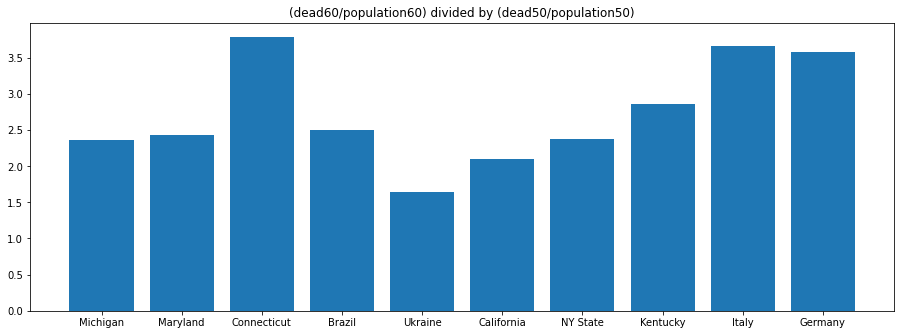

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_title("(dead60/population60) divided by (dead50/population50)")
xlabels = ['Michigan', 'Maryland', 'Connecticut', 'Brazil', 'Ukraine','California','NY State','Kentucky','Italy','Germany']
vals = [2.367920112342019,2.4259259259259,3.7921348314606744,2.4997788918498767,1.6385803404554296,
        2.1054803164894906,2.380305532014734,2.8611111111111116,3.666024778347374,3.581989658177241
        ]
ax.bar(xlabels,vals)
plt.show()